## Pre-process, Create, Train and Save the model

In [14]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [15]:
# Load the dataset
data = pd.read_csv('dataset/breast_cancer.csv')

In [16]:
# Drop the 'id' column and any unnamed columns
data = data.drop(['id'], axis=1)
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)

In [17]:
# Encode the 'diagnosis' column as it's a categorical variable
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [18]:
# Separate features and target variable
X = data.drop('diagnosis', axis=1)

In [19]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [22]:
# Display the first few rows of the clustered data
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [24]:
# Add PCA components to the dataframe
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

In [21]:
# Save the scaler and the model to files
joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(kmeans, 'model/kmeans_model.pkl')

['model/kmeans_model.pkl']

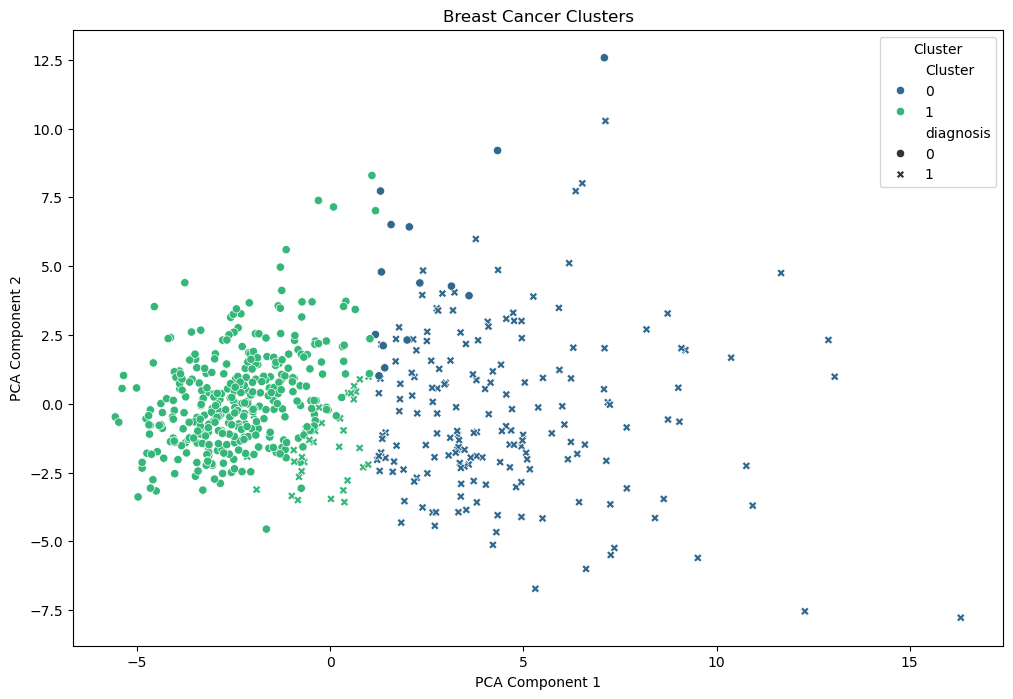

In [25]:
# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', style='diagnosis')
plt.title('Breast Cancer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## Load the Model and Make Predictions on Individual Data

In [26]:
import joblib
import numpy as np

In [35]:
# Load the scaler and the saved K-means model
scaler = joblib.load('model/scaler.pkl')
kmeans = joblib.load('model/kmeans_model.pkl')

In [52]:
input_data1 = np.array([[14.0, 15.0, 89.0, 560.0, 0.1, 0.07, 0.04, 0.05, 0.18, 0.06, 0.3, 1.0, 2.0, 25.0, 0.006, 0.02, 0.02, 0.01, 0.02, 0.005, 17.0, 20.0, 115.0, 700.0, 0.14, 0.1, 0.07, 0.1, 0.2, 0.07]])
input_data2 = np.array([[12.46,	24.04, 83.97, 475.9, 0.1186, 0.2396, 0.2273, 0.08543, 0.203, 0.08243, 0.2976, 1.599, 2.039, 23.94, 0.007149, 0.07217, 0.07743, 0.01432, 0.01789, 0.01008, 15.09, 40.68, 97.65, 711.4, 0.1853, 1.058, 1.105, 0.221, 0.4366, 0.2075]])

In [53]:
# Standardize the input data
input_data_scaled1 = scaler.transform(input_data1)
input_data_scaled2 = scaler.transform(input_data2)

In [54]:
# Predict the cluster for the input data
prediction1 = kmeans.predict(input_data_scaled1)
prediction2 = kmeans.predict(input_data_scaled2)

In [55]:
# Print the result
print(f'Cluster: {prediction1[0]}')
print(f'Cluster: {prediction2[0]}')


Cluster: 1
Cluster: 0
